# Binary Classification using Neural Networks

## 3.4.1 The IMDB dataset

In [1]:
# Download the data and assign train and test sets
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

2023-02-26 20:48:25.539821: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# train_data and test_data are each a list of lists
# train_data = [[sequence], [sequence], ...]
# the inner lists are lists of word indices
# train_data[0] => [1, 14, ..., 32]
# train_labels and test_labels are lists of 1's and 0's corresponding to review sentiment.

## 3.4.2 Preparing the Data

In [3]:
# turn our training and testing data into tensors
# tensors will be of length 10000, and each word index will be marked with 1's, all others with 0's.

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results= np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]= 1
    return results

In [5]:
# x_train and x_test are now OHE vectors 
x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

In [6]:
# vectorize labels
y_train= np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')

## 3.4.3 Building the Neural Network (Model)

In [7]:
# summary: input data are OHE vectors, target data are scalars
# need a simple stack of fully connected Dense layers with relu activations
# each Dense layer is instantiated as Dense(16, activation='relu')
# the argument 16 represents the number of neurons in each layer (the number of 'hidden units').
# a hidden unit is a dimension in the representation space of a layer
# the number of neurons is NOT equivalent to the number of weights.
# Dense layers with relu activations implement the following tensor operation chain:
# output= relu(dot(W, input) + b)
# having 16 hidden units (neurons) means W will have shape (input_dimension, 16)
# the dot product with W projects the input tensor onto a 16-D space, then the bias and relu are applied.

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Compiling the model

In [9]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

## 3.4.4 Validating the Approach

In [10]:
# set aside validation set from training data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
# training the model (batches and epochs)
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5373 - acc: 0.7777 - val_loss: 0.4229 - val_acc: 0.8543
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3380 - acc: 0.8907 - val_loss: 0.3536 - val_acc: 0.8530
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2520 - acc: 0.9185 - val_loss: 0.2889 - val_acc: 0.8881
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2044 - acc: 0.9324 - val_loss: 0.2938 - val_acc: 0.8813
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1699 - acc: 0.9449 - val_loss: 0.2951 - val_acc: 0.8830
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1466 - acc: 0.9533 - val_loss: 0.2901 - val_acc: 0.8833
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1277 - acc: 0.9590 - val_loss: 0.2936 - val_acc: 0.8869
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1104 - a

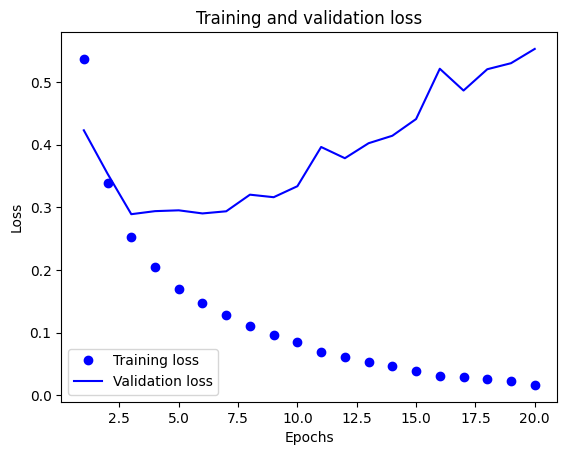

In [36]:
# import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values= history_dict['acc']
epochs = range(1, len(acc_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

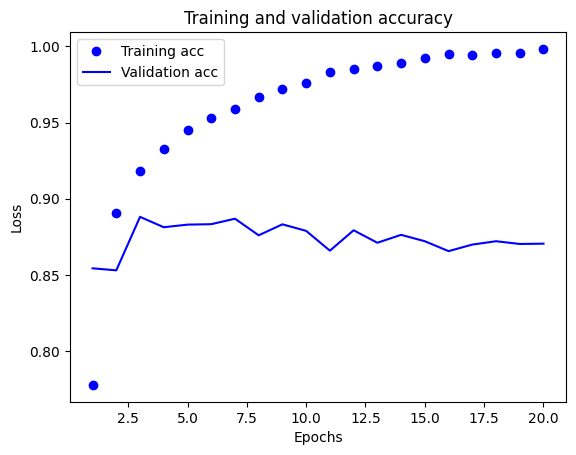

In [37]:
plt.clf()
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
# Retraining model from scratch with fewer epochs
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4831 - accuracy: 0.8068
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2853 - accuracy: 0.9010
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2181 - accuracy: 0.9220
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2910 - accuracy: 0.8839


In [39]:
print(results)

[0.2910289466381073, 0.8839200139045715]


This fairly naive approach achieves an accuracy of 88%. 

## 3.4.5 Predict test targets using trained network

In [41]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.22716421],
       [0.9989371 ],
       [0.9462872 ],
       ...,
       [0.10941366],
       [0.10581814],
       [0.5574689 ]], dtype=float32)

Further options to consider:
- use one or three hidden layers instead of two.
- use 32 or 64 neurons (hidden units) instead of 16.
- use the mse loss function instead of binary_crossentropy.
- use tanh activation function instead of relu.